# 4. Evalution Metrics for Classification
in the previous session we trained a model for predicting churn. How do we know if it's good?

## **4.1 Evalution metrics: session overview:**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
!wget -P ./data $data
df = pd.read_csv(data)

--2025-10-23 15:35:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: './data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

     0K .......... .......... .......... .......... ..........  5% 1,19M 1s
    50K .......... .......... .......... .......... .......... 10% 1,32M 1s
   100K .......... .......... .......... .......... .......... 15% 6,60M 0s
   150K .......... .......... .......... .......... .......... 20% 3,56M 0s
   200K .......... .......... .......... .......... .......... 26% 2,70M 0s
   250K .......... .......... .......... .......... .......... 31% 17,7M 0s
   300

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_test['churn']
del df_val['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges' ]
categorical = ['gender', 
               'seniorcitizen', 
               'partner', 
               'dependents', 
               'phoneservice', 
               'multiplelines', 
               'internetservice',  
               'onlinesecurity', 
               'onlinebackup', 
               'deviceprotection', 
               'techsupport',
               'streamingtv', 
               'streamingmovies', 
               'contract', 
               'paperlessbilling',
               'paymentmethod',]

In [7]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression()
model.fit(X_train, y_train)

D:\ESTUDOS\CURSOS\ml-zoomcamp\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8005677785663591)

## **4.2 Accuracy and dummy model**
* Evaluate the model on different thresholds
* Chack the accuracy of a dummy baselines

In [11]:
len(y_val)

1409

In [15]:
(y_val == churn_decision).sum()

np.int64(1128)

In [16]:
1128 / 1409

0.8005677785663591

In [28]:
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.269
0.05 0.526
0.10 0.619
0.15 0.672
0.20 0.703
0.25 0.747
0.30 0.761
0.35 0.779
0.40 0.786
0.45 0.792
0.50 0.801
0.55 0.796
0.60 0.788
0.65 0.782
0.70 0.759
0.75 0.747
0.80 0.734
0.85 0.731
0.90 0.731
0.95 0.731
1.00 0.731


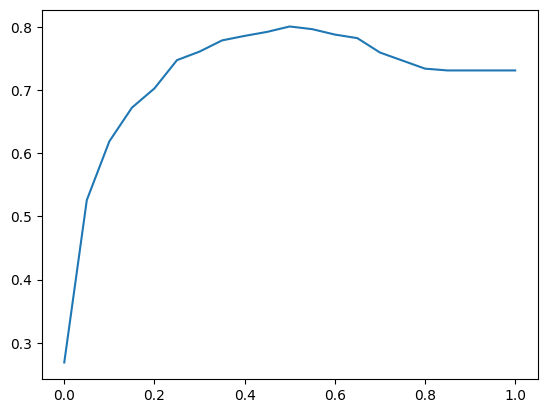

In [23]:
plt.plot(thresholds, scores)

we use our own function to calculate  accuracy, but we don't need to, we can use the scikit-learn aaccuracy_score function, wich is available in the sklearn.metrics package:

In [29]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred >= 0.5)

In [30]:
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.269
0.05 0.526
0.10 0.619
0.15 0.672
0.20 0.703
0.25 0.747
0.30 0.761
0.35 0.779
0.40 0.786
0.45 0.792
0.50 0.801
0.55 0.796
0.60 0.788
0.65 0.782
0.70 0.759
0.75 0.747
0.80 0.734
0.85 0.731
0.90 0.731
0.95 0.731
1.00 0.731


In [32]:
from collections import Counter

In [35]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

## 4.3 Confusion table
* Different types of errors and correct decisions
* Arranging them in a table

In [36]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [38]:
t = 0.5
predict_positive = (y_pred >= t )
predict_negative = (y_pred < t )

In [40]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [42]:
tn, tp

(np.int64(927), np.int64(201))

In [46]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [48]:
fp, fn

(np.int64(103), np.int64(178))

creating the confusion table with numpy:

In [50]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[927, 103],
       [178, 201]])

In [56]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.66, 0.07],
       [0.13, 0.14]])

## 4.4 Precision and Recall

In [54]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.8005677785663591)

Precision:

In [57]:
p = tp / (tp + fp)

np.float64(0.6611842105263158)

Recall:

In [58]:
r = tp / (fn + tp)

np.float64(0.5303430079155673)

**Conclusion: accuracy can be misleading, especially in cases where there is class imbalance**

## **4.5 ROC curves**